In [0]:
from keras.datasets import mnist

In [13]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


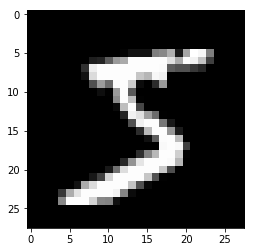

In [19]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0],cmap = 'gray')

In [35]:
single_image = X_train.shape
single_image

(60000, 28, 28)

In [20]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
from keras.utils.np_utils import to_categorical
import numpy as np

In [0]:
y_test_cat = to_categorical(y_test,10)
y_train_cat = to_categorical(y_train,10)

In [27]:
y_test_cat[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [0]:
X_train  = X_train/X_train.max()

In [0]:
X_test = X_test/X_test.max()

In [34]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [40]:
X_train = X_train.reshape(60000,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [44]:
X_test = X_test.reshape(10000,28,28,1)
X_test.shape

(10000, 28, 28, 1)

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [0]:
model = Sequential()

In [58]:
model.add(Conv2D(filters = 32 , kernel_size = (4,4) , input_shape = (28,28,1) , activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

In [0]:
model.add(Flatten())

In [0]:
model.add(Dense(128,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer ='rmsprop' , metrics = ['accuracy'])


In [78]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3872)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               495744    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 513,994
Trainable params: 513,994
Non-trainable params: 0
________________________________________________

In [79]:
model.fit(X_train,y_train_cat,epochs = 2)

Epoch 1/2
60000/60000 [==============================] - 149s 2ms/step - loss: 0.1059 - acc: 0.9677
Epoch 2/2
60000/60000 [==============================] - 146s 2ms/step - loss: 0.0409 - acc: 0.9878


In [82]:
model.metrics_names


['loss', 'acc']

In [86]:
model.evaluate(X_test,y_test_cat)


10000/10000 [==============================] - 5s 520us/step


[0.03527822327945323, 0.9899]

In [0]:
from sklearn.metrics import classification_report
predictions = model.predict_classes(X_test)

In [88]:
predictions

array([7, 2, 1, ..., 4, 5, 6])

In [89]:
y_test_cat

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [91]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

